In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
np.random.seed(42)
heights = np.random.normal(loc=170, scale=10, size=1000)
incomes = np.random.exponential(scale=50000, size=1000)
scores = np.random.beta(a=5, b=1, size=1000) * 100

In [6]:
data = pd.DataFrame({
    "Heights": heights,
    "Incomes": incomes,
    "Scores": scores
})
data.head()

,Heights,Incomes,Scores
0,174.967142,9165.056757,82.603419
1,168.617357,5522.440864,90.269879
2,176.476885,50589.205735,81.851508
3,185.230299,61289.746976,93.675733
4,167.658466,1604.787337,85.928679


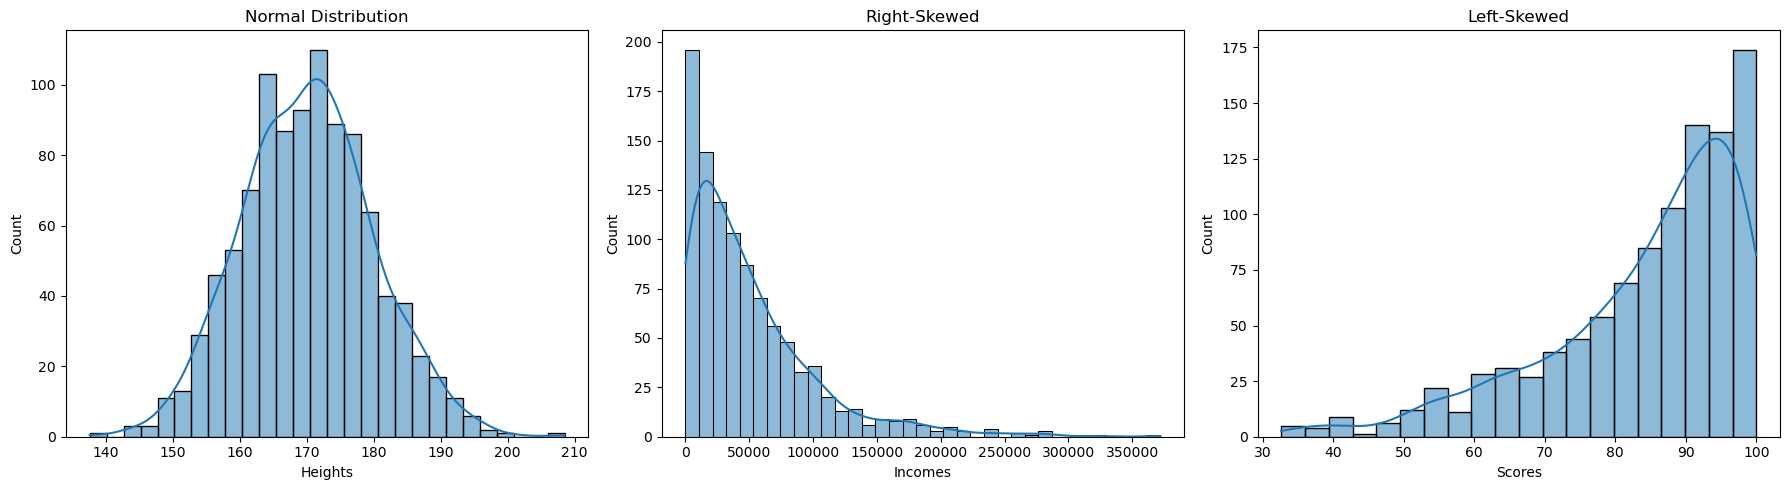

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data["Heights"], kde=True)
plt.title("Normal Distribution")
plt.subplot(1,3,2)
sns.histplot(data["Incomes"], kde=True)
plt.title("Right-Skewed")
plt.subplot(1,3,3)
sns.histplot(data["Scores"], kde=True)
plt.title("Left-Skewed")
plt.tight_layout()
plt.show()


In [8]:
for column in data.columns:
    mean = data[column].mean()
    median = data[column].median()
    skew = data[column].skew()
    print(f"\n{column}")
    print("Mean   :", round(mean,2))
    print("Median :", round(median,2))
    print("Skew   :", round(skew,2))



Heights
Mean   : 170.19
Median : 170.25
Skew   : 0.12

Incomes
Mean   : 50399.3
Median : 36296.56
Skew   : 1.98

Scores
Mean   : 84.12
Median : 88.14
Skew   : -1.23


In [9]:
data.head()

,Heights,Incomes,Scores
0,174.967142,9165.056757,82.603419
1,168.617357,5522.440864,90.269879
2,176.476885,50589.205735,81.851508
3,185.230299,61289.746976,93.675733
4,167.658466,1604.787337,85.928679


In [10]:
mean_values = data.mean()
std_values = data.std()

print("Mean:\n", mean_values)
print("\nStandard Deviation:\n", std_values)


Mean:
 Heights      170.193321
Incomes    50399.296685
Scores        84.120371
dtype: float64

Standard Deviation:
 Heights        9.792159
Incomes    50149.425449
Scores        13.934219
dtype: float64


In [11]:
z_scores = (data - mean_values) / std_values
z_scores.head()

,Heights,Incomes,Scores
0,0.487515,-0.822228,-0.108865
1,-0.160941,-0.894863,0.441324
2,0.641693,0.003787,-0.162827
3,1.535614,0.217160,0.685748
4,-0.258866,-0.972982,0.129775


In [12]:
z_data = pd.concat([data, z_scores.add_suffix('_z')], axis=1)
z_data.head()

,Heights,Incomes,Scores,Heights_z,Incomes_z,Scores_z
0,174.967142,9165.056757,82.603419,0.487515,-0.822228,-0.108865
1,168.617357,5522.440864,90.269879,-0.160941,-0.894863,0.441324
2,176.476885,50589.205735,81.851508,0.641693,0.003787,-0.162827
3,185.230299,61289.746976,93.675733,1.535614,0.217160,0.685748
4,167.658466,1604.787337,85.928679,-0.258866,-0.972982,0.129775


In [13]:
outliers = z_data[
    (z_data["Heights_z"].abs() > 3) |
    (z_data["Incomes_z"].abs() > 3) |
    (z_data["Scores_z"].abs() > 3)
]

outliers

,Heights,Incomes,Scores,Heights_z,Incomes_z,Scores_z
8,165.305256,61732.000203,39.393109,-0.499181,0.225979,-3.209887
37,150.403299,280431.561602,95.852179,-2.021007,4.586937,0.841942
52,163.230780,219703.194576,73.371988,-0.711032,3.375989,-0.771366
92,162.979469,175030.522721,42.037259,-0.736697,2.485197,-3.020127
128,170.996514,215737.554227,63.136678,0.082024,3.296912,-1.505911
139,157.691357,1521.599046,38.012549,-1.276732,-0.974641,-3.308963
168,167.546119,372086.145485,99.294356,-0.270339,6.414567,1.088973
184,167.765372,85141.905319,35.598959,-0.247948,0.692782,-3.482177
209,208.527315,25443.275710,90.536173,3.914764,-0.497633,0.460435
216,162.271748,155639.936250,40.935279,-0.808971,2.098541,-3.099211


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

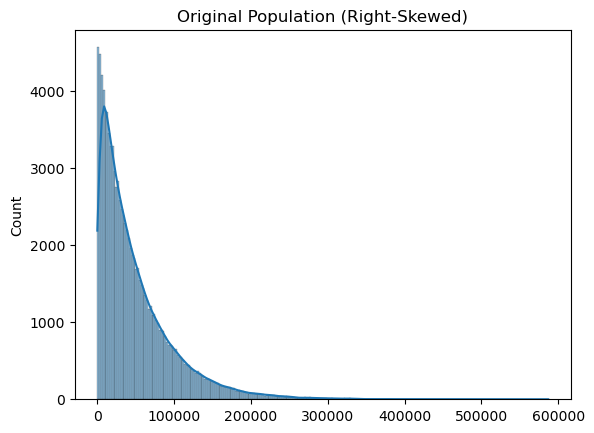

In [16]:
np.random.seed(42)
population = np.random.exponential(scale=50000, size=100000)
sns.histplot(population, kde=True)
plt.title("Original Population (Right-Skewed)")
plt.show()

In [17]:
sample_means = []

for i in range(1000):
    sample = np.random.choice(population, size=30)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sample_means = np.array(sample_means)

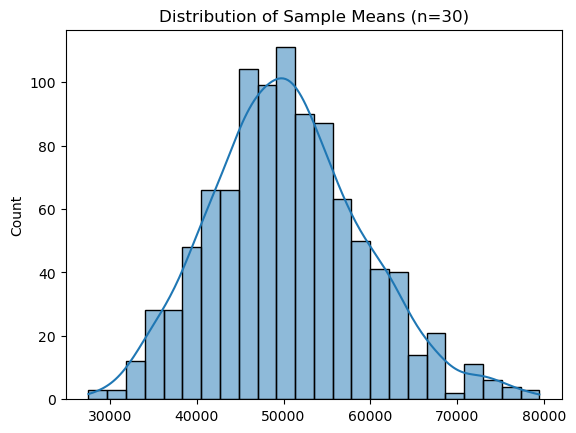

In [18]:
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means (n=30)")
plt.show()

In [19]:
print("Population Mean:", round(np.mean(population), 2))
print("Mean of Sample Means:", round(np.mean(sample_means), 2))

Population Mean: 49798.51
Mean of Sample Means: 50489.69
